# **`CALLBACK FUNCTIONS`**

In [1]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [2]:
#checking version of tensorflow and keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.12.0
Keras Version 2.12.0


Q2. Load the Wine Quality dataset and explore its dimensions.

In [3]:
# reading the dataset
df = pd.read_csv('wine.csv')

In [4]:
df.shape

(1599, 12)

#### Insight: total 1599 observations with 12 features

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


Q3. Check for null values, identify categorical variables, and encode them.

In [6]:
#check for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Insight: no null values

In [7]:
#checking for categorical variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [8]:
# target variable is categorical
df.quality.unique()

array(['bad', 'good'], dtype=object)

In [9]:
#encoding target variable
df['quality'] = df.quality.map({'bad':0,'good':1})

Q4. Separate the features and target variables from the dataframe.

In [10]:
X = df.drop('quality',axis=1)
y = df['quality']

In [11]:
X.shape , y.shape

((1599, 11), (1599,))

Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

In [12]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [13]:
X_train_full.shape,X_test.shape,y_train_full.shape,y_test.shape

((1119, 11), (480, 11), (1119,), (480,))

In [14]:
X_train , X_val , y_train , y_val = train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=42)

In [15]:
X_train.shape , X_val.shape , y_train.shape , y_val.shape 

((895, 11), (224, 11), (895,), (224,))

Q6. Perform scaling on the dataset.

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [17]:
X_train[0] , X_val[0] ,X_test[0]

(array([ 0.59068961,  0.41222487, -0.04196674,  0.63215602,  0.04790641,
         0.87228742,  1.18501003,  1.60897428, -0.47978   , -0.21383167,
        -0.66892463]),
 array([-0.52427063,  1.36450688, -0.40114931,  1.93113988,  0.12911142,
         0.28167042,  1.51619319,  0.2036935 , -1.00320295, -0.81660127,
        -0.79576185]),
 array([-0.34822428,  0.1401443 , -0.96557905, -0.01733591,  0.53513642,
        -0.21051042, -0.04939995,  0.1876025 , -0.47978   ,  0.02727617,
        -0.76405254]))

Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

In [18]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[11,], name = 'inputLayer'),
          tf.keras.layers.Dense(300 , activation = "relu" , name = 'hiddenLayer1'),
          tf.keras.layers.Dense(100 , activation = "relu" , name = 'hiddenLayer2'),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(10, activation = "relu" , name = "hiddenLayer3"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(1, activation = "sigmoid" , name = "outputLayer"),]
model_clf = tf.keras.models.Sequential(LAYERS)

Q8. Create a Sequential model and add all the layers to it.

In [19]:
model_clf.layers

Q12. Print the model summary.

In [20]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 11)                0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               3600      
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 hiddenLayer3 (Dense)        (None, 10)                1010      
                                                                 
 batch_normalization_1 (Batc  (None, 10)               40        
 hNormalization)                                        

Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].<br>
Q14. Compile the model with the specified loss function, optimizer, and metrics.

In [21]:
LOSS_FUNCTION = "binary_crossentropy"
OPTIMIZER = "Adam"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.

In [22]:
# tensorboard callback
import time 

def get_log_path(log_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  os.makedirs(log_dir,exist_ok=True)
  logs_path = os.path.join(log_dir, fileName)
  print(f"Saving logs at {logs_path}")
  return logs_path

log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Saving logs at logs/fit\log_2023_06_13_20_31_51


Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if
no improvement is observed.

In [23]:
#early stopping callback
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during
training.

In [24]:
#model checkpoint callback
CKPT_path = "Model_ckpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint
callbacks.

In [25]:
# training

EPOCHS = 100
VALIDATION_SET = (X_val, y_val)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,checkpointing_cb] )


Epoch 1/100
28/28 [==============================] - 6s 35ms/step - loss: 0.5834 - accuracy: 0.7207 - val_loss: 0.6373 - val_accuracy: 0.6696
Epoch 2/100
28/28 [==============================] - 0s 18ms/step - loss: 0.4879 - accuracy: 0.7575 - val_loss: 0.6076 - val_accuracy: 0.7143
Epoch 3/100
28/28 [==============================] - 0s 17ms/step - loss: 0.4350 - accuracy: 0.7922 - val_loss: 0.6044 - val_accuracy: 0.6875
Epoch 4/100
28/28 [==============================] - 0s 12ms/step - loss: 0.4258 - accuracy: 0.8112 - val_loss: 0.6064 - val_accuracy: 0.6518
Epoch 5/100
28/28 [==============================] - 0s 15ms/step - loss: 0.4102 - accuracy: 0.8134 - val_loss: 0.6031 - val_accuracy: 0.6295
Epoch 6/100
28/28 [==============================] - 0s 14ms/step - loss: 0.3985 - accuracy: 0.8179 - val_loss: 0.6153 - val_accuracy: 0.5982
Epoch 7/100
28/28 [==============================] - 0s 13ms/step - loss: 0.3723 - accuracy: 0.8201 - val_loss: 0.6049 - val_accuracy: 0.6741
Epoch 

Q16. Get the model's parameters.

In [26]:
# weights of the first parameter
model_clf.get_weights()[0]

array([[-0.03942149,  0.0867359 , -0.14307657, ..., -0.05559339,
         0.03804253,  0.10539097],
       [-0.04068967, -0.04782216,  0.0870199 , ..., -0.06927139,
        -0.10745093, -0.04660782],
       [-0.05941773, -0.11461141, -0.03739243, ...,  0.13385464,
         0.01318844,  0.08053795],
       ...,
       [ 0.01400722,  0.12526633, -0.13050635, ...,  0.03810493,
         0.06180534, -0.01105727],
       [-0.12994236, -0.00449327, -0.06598718, ...,  0.13386187,
         0.02649647, -0.01559212],
       [ 0.09505426,  0.05815284,  0.12287787, ...,  0.0565854 ,
         0.01077805,  0.02848194]], dtype=float32)

Q17. Store the model's training history as a Pandas DataFrame.

In [27]:
training_history = pd.DataFrame(history.history)
training_history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.583381,0.720670,0.637268,0.669643
1,0.487863,0.757542,0.607611,0.714286
2,0.434970,0.792179,0.604424,0.687500
3,0.425837,0.811173,0.606372,0.651786
4,0.410179,0.813408,0.603061,0.629464


Q18. Plot the model's training history.

<Axes: >

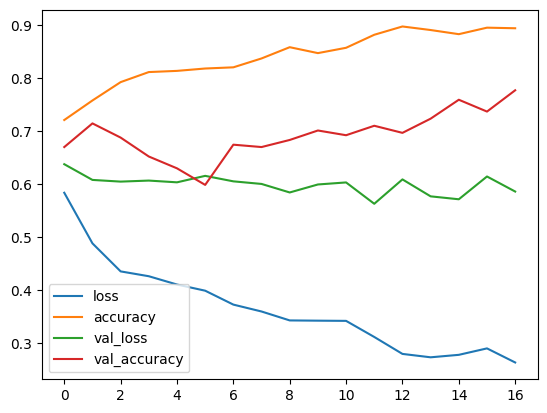

In [28]:
training_history.plot()

Q19. Evaluate the model's performance using the test data.

In [29]:
model_clf.evaluate(X_test,y_test)

15/15 [==============================] - 0s 5ms/step - loss: 0.5528 - accuracy: 0.7188


[0.5527637004852295, 0.71875]